# Artworks and Artists Experimentation

Checking out the data...
* What categories are there?
* Some fun plotting different variables together
* Different ways of plotting the variables together

In [2]:
import numpy as np
import pandas as pd

artistData = pd.read_csv("artists.csv", delimiter = ",")
artworksData = pd.read_csv("artworks.csv", delimiter = ",")

print(artistData , artworksData)

       Artist ID             Name Nationality Gender  Birth Year  Death Year
0              1   Robert Arneson    American   Male      1930.0      1992.0
1              2   Doroteo Arnaiz     Spanish   Male      1936.0         NaN
2              3      Bill Arnold    American   Male      1941.0         NaN
3              4  Charles Arnoldi    American   Male      1946.0         NaN
4              5      Per Arnoldi      Danish   Male      1941.0         NaN
...          ...              ...         ...    ...         ...         ...
15086      67452      Liu Jianhua     Chinese   Male      1962.0         NaN
15087      67453         Leng Lin     Chinese   Male      1965.0         NaN
15088      67652     Ellie Nagler         NaN    NaN         NaN         NaN
15089      67694   Glenn Williams         NaN   Male         NaN         NaN
15090      67695        Ely Ramen         NaN    NaN         NaN         NaN

[15091 rows x 6 columns]         Artwork ID                                

The following cell saves all the artists names to a list.

In [3]:

"""artists = artistData['Name'].tolist()
print(artists)"""


"artists = artistData['Name'].tolist()\nprint(artists)"

The following cell saves the column headers to lists.

In [4]:
artistColumns = artistData.columns.tolist()
artworksColumns = artworksData.columns.tolist()

print (artistColumns)
print (artworksColumns)

['Artist ID', 'Name', 'Nationality', 'Gender', 'Birth Year', 'Death Year']
['Artwork ID', 'Title', 'Artist ID', 'Name', 'Date', 'Medium', 'Dimensions', 'Acquisition Date', 'Credit', 'Catalogue', 'Department', 'Classification', 'Object Number', 'Diameter (cm)', 'Circumference (cm)', 'Height (cm)', 'Length (cm)', 'Width (cm)', 'Depth (cm)', 'Weight (kg)', 'Duration (s)']


*'Artist ID'* is a column common to both files.
Finding columns common to both files on longer lists can be more complex. One way to do this with code is shown below.

In [5]:
overlapColumns = []

for col in artistColumns:
    for otherCol in artworksColumns:
        if otherCol == col:
            overlapColumns.append(col)

print (overlapColumns)

['Artist ID', 'Name']


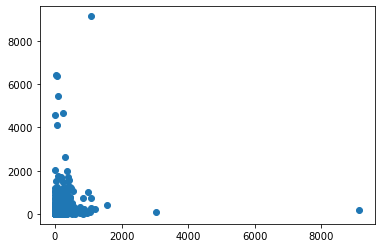

In [11]:
import matplotlib.pyplot as plt

xvals = artworksData['Height (cm)']
yvals = artworksData['Width (cm)']

plt.plot(xvals, yvals, marker = 'o', linestyle = "")
plt.show()

### Plot Idea 1
Plot the sizes of the paintings as semi-transparent quadrilaterals so that the darkest quadrilateral is the most common size. This isn't applicable for all different types of media, so I need to check what types of media there are. This is shown below. I have chosen to use only paintings to start with, then likely include drawings and photographs if that makes sense for the plot.

In [14]:
#Print all unique values within classifcation

print(artworksData['Classification'].unique())

['Architecture' 'Mies van der Rohe Archive' 'Design' 'Illustrated Book'
 'Print' 'Drawing' 'Film' 'Multiple' 'Periodical' 'Photograph' 'Painting'
 'Product Design' 'Photography Research/Reference' 'Media' 'Sculpture'
 'Textile' 'Installation' 'Video' 'Work on Paper' 'Audio' 'Performance'
 '(not assigned)' 'Film (object)' 'Ephemera' 'Collage'
 'Frank Lloyd Wright Archive' 'Furniture and Interiors' 'Software']


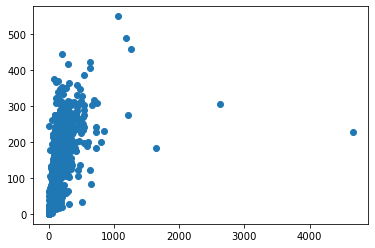

In [38]:
paintingWidth = []
paintingHeight = []
counter = 0

#For each of the pieces of art "media" check if it is a painting then add it's dimensions to the list if it is!
for media in artworksData['Classification']:
    counter += 1
    if media == 'Painting':
        paintingWidth.append(artworksData['Width (cm)'][counter])
        paintingHeight.append(artworksData['Height (cm)'][counter])

plt.plot(paintingWidth, paintingHeight, linestyle ='', marker = 'o')